In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set({'figure.figsize': (15, 5)})
sns.set_palette('colorblind')

In [34]:
totdat = pd.DataFrame([])
fits = pd.DataFrame([])
logpath_t = '../../logs/coopfixed2_commonpot/{}_rep_{}/'
gen = 29999
for rep in range(1):
    for cond in ['fake', 'nofake']:
        logpath = logpath_t.format(cond, rep)
        try:
            data = pd.read_csv(logpath + 'analysis_log_{}.txt'.format(gen), delimiter="\t")
        except FileNotFoundError as e:
            print(repr(e))

        else:
            fit = pd.read_csv(logpath + 'fitnesslog.txt', delimiter="\t")
            fit['rmedfit'] = fit['medfit'].rolling(100).mean()
            fit['cond'] = cond
            fit['rep'] = rep
            fits = pd.concat((fits, fit), ignore_index=True)
            data['ind'] = data['ind'] + rep * 100
            data['cond'] = cond
            curind = data
            curind['realinv'] = np.where(curind['onOpp'], curind['ownCoop'], np.nan)
            totinv = curind.groupby(('cond', 'coop', 'ind'), as_index=False).mean()
            totinv['totinv'] = curind.groupby(('cond', 'coop', 'ind'), as_index=False).sum()['realinv']
            totdat = pd.concat((totdat, totinv), ignore_index=True)


/home/paul/miniconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


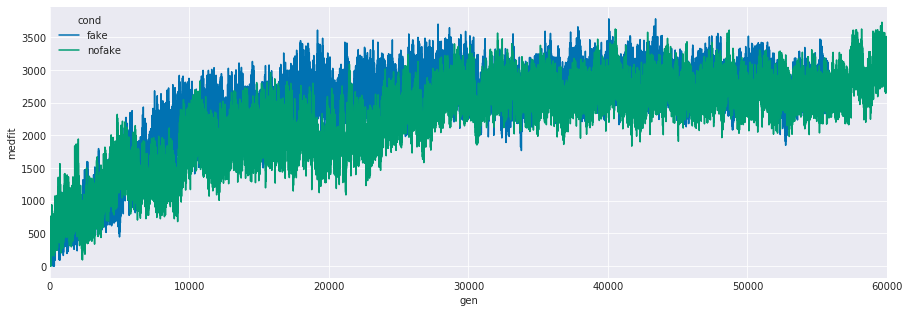

In [36]:
sns.tsplot(data=fits, time='gen', unit='rep', value='medfit', condition='cond')

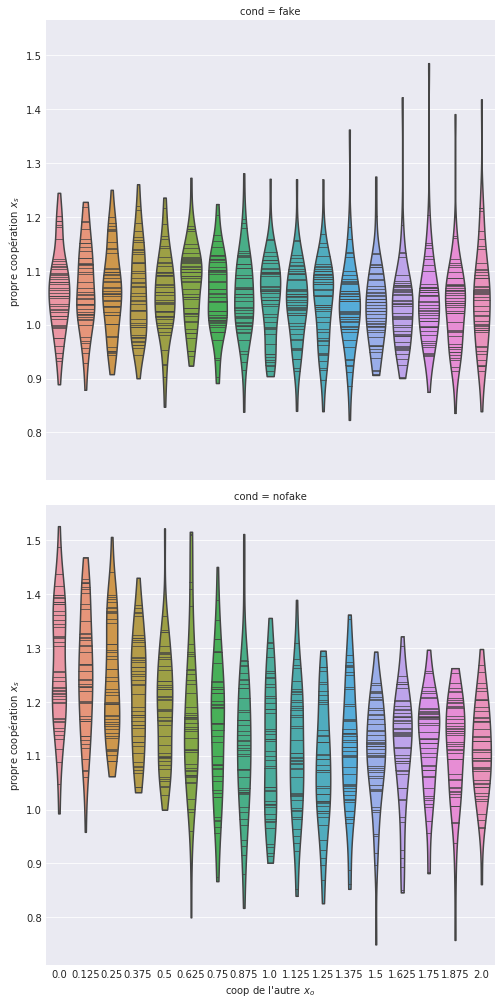

In [30]:
g  = sns.factorplot(data=totdat, x='coop', y='realinv', row="cond", cut=0, inner='sticks', kind='violin', size=7)
g.set_xlabels('coop de l\'autre $x_o$')
g.set_ylabels('propre coopération $x_s$')


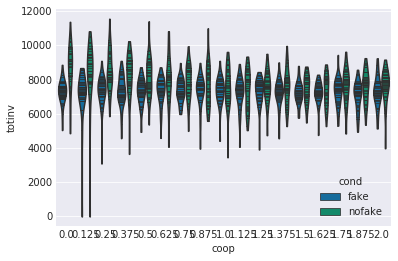

In [31]:
sns.violinplot(data=totdat, hue='cond', x='coop', y='totinv', cut=0, inner='sticks')

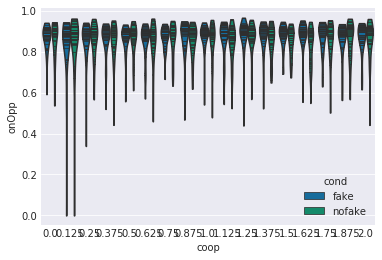

In [32]:
sns.violinplot(data=totdat, hue='cond', x='coop', y='onOpp', cut=0, inner='sticks')

In [13]:
import numpy as np
from json_tricks import load
with open(logpath + '/genomes_29999.txt') as f:
    gens = np.asarray(load(f))

array([0.01562544, 0.01287433, 0.01543748, 0.01864764, 0.00325429,
       0.016744  , 0.01789455, 0.01688274, 0.01635605, 0.01828016,
       0.01390802, 0.01850984, 0.01621288, 0.01715487, 0.01581547,
       0.01292465, 0.00842278, 0.01267065, 0.01635879, 0.01633706,
       0.01701517, 0.01660883, 0.01889103, 0.00735971, 0.01478176,
       0.01339109, 0.01564089, 0.01200703, 0.01745236, 0.01469846,
       0.01535814, 0.00974656, 0.01657913, 0.00482231, 0.01420106,
       0.01400446, 0.01359939, 0.01683347, 0.01592814, 0.01679677,
       0.01517631, 0.01782437, 0.00843599, 0.00455652, 0.01023691,
       0.0160019 , 0.01935841, 0.0168012 , 0.01610732, 0.00965181,
       0.00346438, 0.01542008, 0.01583052, 0.0157418 , 0.01690428,
       0.01562458, 0.01522874, 0.01531617, 0.02113548, 0.00208139,
       0.01663277, 0.01727009, 0.01383526, 0.01407278, 0.01417457,
       0.01756823, 0.01509502, 0.0146562 , 0.01605636, 0.0125292 ,
       0.01768618, 0.00906205, 0.00239215, 0.01515634, 0.01476